# Matemática Computacional II
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Otimização multidimensional sem restrições

Problemas de otimização estão relacionados à busca de máximos e mínimos de funções, sejam elas de uma ou mais variáveis. A localização de raízes (vista em MTM Comp. I) e a otimização estão relacionadas no sentido que ambas envolvem a estimativa e a busca de um ponto na função. A diferença fundamental entre os dois tipos de problema é que a localização das raízes envolve a busca dos zeros de uma função ou funções. Em contraste, a otimização envolve a busca de um mínimo ou de um máximo, que são calculados pela raiz da derivada.

A engenharia, em geral, deve sempre pensar em projetar artefatos e produtos que desempenhem tarefas de forma eficiente. Ao fazer isso, eles estão restritos pelas limitações do mundo físico. Além disso, devem manter os custos baixos. Portanto, estão sempre confrontando problemas de otimização que equilibram eficiência e limitações.

Alguns casos comuns podem ser:
- Projeto de uma aeronave com peso mínimo e resistência máxima;
- Trajetória ótima de veículos espaciais;
- Projeto de estruturas de engenharia civil com custo mínimo;
- Projeto de reservatórios de água como represas para diminuir os danos de enchentes e ao mesmo tempo fornecendo a máxima potência hídrica;
- Previsão do comportamento de estruturas pela minimização da energia potencial.
- Estratégia de corte de material com custo mínimo;
- Projeto de bombas e equipamento de transferência de calor para eficiência máxima;
- Maximização da potência de saída de redes elétricas e de máquinas, ao mesmo tempo minimizando a geração de calor;
- Rota mais curta de um caixeiro-viajante visitando várias cidades em uma viagem de vendas.

No caso bidimensional, a otimização de funções pode ser vista no contexto de subida de uma montanha (máximos) ou na descida (vale), como pode ser visto na figura abaixo:

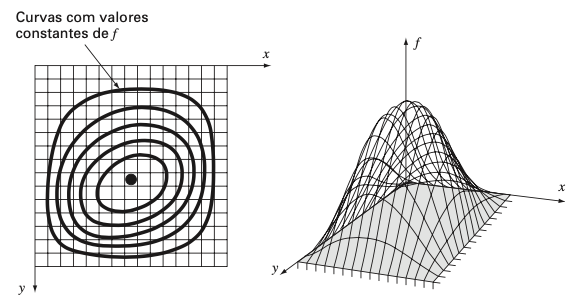

Técnicas para a otimização multidimensional sem restrições podem ser classificadas de diversas maneiras. Para o propósito da presente discussão, elas serão divididas dependendo do fato de exigirem ou não o cálculo da derivada. As abordagens que não exigem o cálculo da derivada são chamadas de não-gradientes ou de métodos diretos. Aquelas que exigem derivadas são chamadas métodos gradientes ou de declive (ou aclive).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Busca aleatória

O método da busca aleatória é um abordagem de *força bruta*, ou seja, ele calcula repetidamente a função em valores independentes escolhidos aleatoriamente. Se um número suficiente de amostras for estudado, o valor ótimo será eventualmente localizado.

**Exemplo 1**

Localize o máximo de $$f(x,y) = y - x - 2x^2 - 2xy - y^2$$

no intervalo $[-2,2] \times [1,3]$.

In [4]:
# Gerando números aleatórios:
# A funcao random gera numeros aleatorios entre 0 e 1
import random as rd

f = lambda x,y: y - x - (2*x)**2 - 2*x*y - y**2

rd.seed()
xi = rd.random()
yi = rd.random()

print(f'O numero aleatorio x é: {xi}')
print(f'O numero aleatorio y é: {yi}')

O numero aleatorio x é: 0.8996364466793936
O numero aleatorio y é: 0.2114705220831602


Se um número randomico for denotado por $r$, então a fórmula

$$x = x_l + (x_u - x_l)r$$

pode ser utilizada para encontrar valores aleatórios de $x$ dentro de um intervalo $[x_l, x_u]$.

No nosso exemplo, $x_l = -2$ e $x_u = 2$, e para $y$, $y_l = 1$ e $y_u = 3$.

In [6]:
# x = -2 + (2 - (-2))r = -2 + 4r
xal = lambda r: -2 + 4*r

# y = 1 + (3 - 1)r = 1 + 2r
yal = lambda r: 1 + 2*r

# o código seguinte calcula, a partir dos pontos aleatórios x e y, o valor da
# funcão nesses pares (x,y), e o máximo valor entre essas tentativas é armazenada
# na variável maxf, com os valores de x e y correspondentes armazenados em max_x e max_y


def random_search(f, f1, f2, n_iter):
  max_f  = -1e-9

  for i in range(n_iter):
    xi = rd.random()
    yi = rd.random()

    xa = f1(xi)
    ya = f2(yi)

    fn = f(xa,ya)
    if fn > max_f:
      max_f = fn
      max_x = xa
      max_y = ya

  print(f'O máximo da função para {n_iter} iterações é dado por {max_f}, e ocorre no ponto ({max_x, max_y})')

random_search(f, xal, yal, 1000)
random_search(f, xal, yal, 2000)
random_search(f, xal, yal, 3000)
random_search(f, xal, yal, 4000)
random_search(f, xal, yal, 5000)
random_search(f, xal, yal, 6000)
random_search(f, xal, yal, 7000)
random_search(f, xal, yal, 8000)
random_search(f, xal, yal, 9000)
random_search(f, xal, yal, 10000)

O máximo da função para 1000 iterações é dado por 0.5423778304444278, e ocorre no ponto ((-0.4418063256389839, 1.0170149202919898))
O máximo da função para 2000 iterações é dado por 0.5528059078343925, e ocorre no ponto ((-0.4132495665735001, 1.0198685728202792))
O máximo da função para 3000 iterações é dado por 0.5538692976962902, e ocorre no ponto ((-0.4194496497686995, 1.0043965494640672))
O máximo da função para 4000 iterações é dado por 0.561013631417091, e ocorre no ponto ((-0.36162409187886047, 1.0027573652731891))
O máximo da função para 5000 iterações é dado por 0.5525515720748462, e ocorre no ponto ((-0.36964984103497356, 1.0334335247875295))
O máximo da função para 6000 iterações é dado por 0.5587615611387515, e ocorre no ponto ((-0.35334451311126136, 1.0062184162022336))
O máximo da função para 7000 iterações é dado por 0.5527757734676542, e ocorre no ponto ((-0.4229438755937234, 1.0033640970126898))
O máximo da função para 8000 iterações é dado por 0.5514338504761447, e oc

## Método do aclive máximo

O método do aclive máximo está contido nas técnicas que utilizam a derivada da função para otimizá-la.

### O Gradiente
Para desenvolver nossa técnica, precisamos primeiro revisar o conceito de **gradiente**.

O gradiente de uma função de duas variáveis é o vetor que indica a  direção de maior crescimento desta, ou seja, é uma grandeza vetorial que "aponta" para o maior valor da função, a partir de um ponto inicial. O cálculo do gradiente é feito pelas derivadas parciais da função. Supondo que $f(x,y)$ é dada, o gradiente de $f$ é calculado por

$$\overrightarrow{\nabla} f(\overrightarrow{x}) = \dfrac{\partial f}{\partial x}\overrightarrow{i} + \dfrac{\partial f}{\partial y}\overrightarrow{j}$$

**Exemplo 2**

Encontre o gradiente da função $$f(x,y) = xy^2$$ no ponto $(2,2)$.

Primeiro, calculamos as derivadas parciais de $f$:
\begin{eqnarray}
\dfrac{\partial f}{\partial x} & = & y^2 \\
\dfrac{\partial f}{\partial y} & = & 2xy
\end{eqnarray}

Calculando no ponto $(2,2)$, temos
\begin{eqnarray}
\dfrac{\partial f}{\partial x} & = & 4 \\
\dfrac{\partial f}{\partial y} & = & 8
\end{eqnarray}

Ou seja,

$$\overrightarrow{\nabla} f(\overrightarrow{x}) = 4\overrightarrow{i} + 8\overrightarrow{j}$$

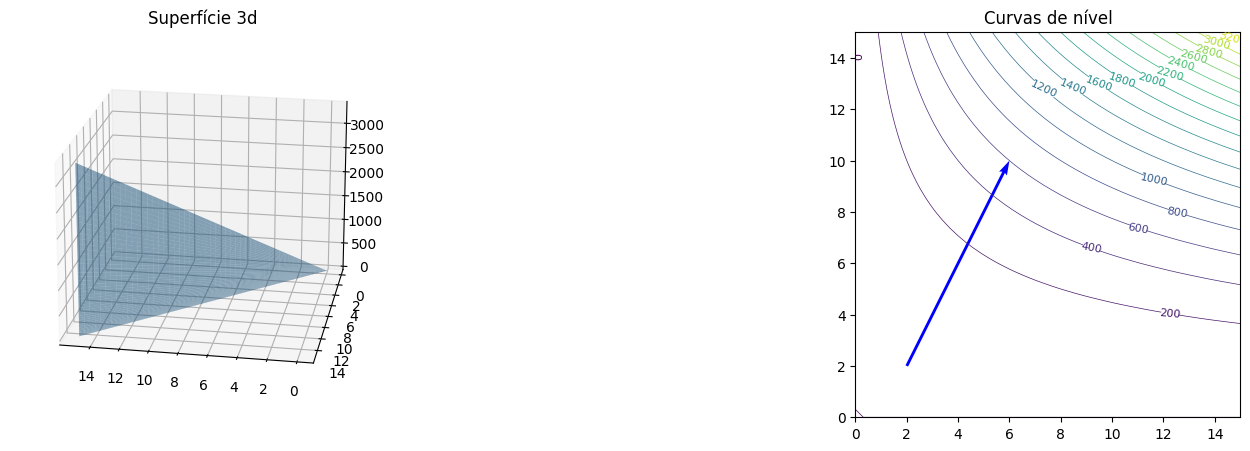

In [7]:
x = np.linspace(0, 15)
y = np.linspace(0, 15)
xi, yi = np.meshgrid(x, y)

f = lambda x,y: x*y**2
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f(xi,yi), alpha=0.5)
ax.view_init(20, 100)
plt.title('Superfície 3d')

ax = fig.add_subplot(122)
c = plt.contour(x, y, f(xi,yi),20, linewidths=0.5)
plt.clabel(c, inline=2, fontsize=8)
plt.quiver(2, 2, 4, 8, color='b',
           angles='xy', scale_units='xy', scale=1)
plt.axis('scaled')
plt.title('Curvas de nível')
plt.show()

### Mas por que estudar o gradiente?

Como esse vetor nos mostra a direção de maior crescimento da função, ele é uma excelente ferramente para encontrarmos o valor máximo (ou mínimo, basta trocar o sinal) de uma função. Agora, note que não basta encontrar o gradiente e segui-lo diretamente para encontrar o valor máximo e uma função. O gráfico acima nos dá uma noção do porquê.

**obs.:** as derivadas parciais podem ser calculadas tanto via diferenças finitas, como pela biblioteca ```sympy```

Reconhecendo esse fato, podemos adotar a seguinte estratégia: caminhe uma distância curta na direção do gradiente. Então pare, recalcule o gradiente e ande novamente uma distância curta. Repetindo esse processo, podemos eventualmente chegar ao máximo da função.

Embora a estratégia pareça superficialmente correta, não é muito prática. Em particular, os cálculos contínuos do gradiente podem ser computacionalmente exigentes. Uma abordagem preferível envolve o movimento ao longo de um caminho fixo na direção do gradiente até que $f(x, y)$ pare de crescer, isto é, fique nivelada na direção do crescimento. Esse ponto de parada será o ponto de partida onde $\overrightarrow{\nabla} f$ é recalculado e uma nova direção será seguida. O processo se repete até que o pico seja atingido. Esse processo é chamado de **método do aclive máximo**. Essa é a mais direta das técnicas de busca baseadas no gradiente.

A idéia básica por trás de tal abordagem é mostrada na figura abaixo

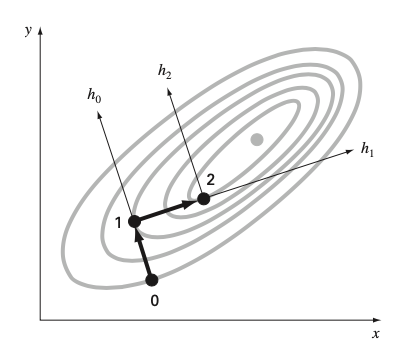


O começo é em um ponto inicial $(x_0, y_0)$ rotulado como $0$ na figura. Nesse ponto, determina-se a direção do aclive máximo, isto é, o gradiente. Então, faz-se uma busca na direção do gradiente, $h_0$, até se encontrar um máximo, que é rotulado como $1$ na figura. O processo é então repetido.

Assim, o problema se reduz simplesmente a duas partes:
- (1) determinar a “melhor” direção de busca;
- (2) determinar o “melhor valor” ao longo dessa direção de busca.

Começando em $(x_0, y_0)$, as coordenadas de um ponto qualquer na direção do gradiente podem ser expressas como

\begin{eqnarray}
x & = & x_0 + \dfrac{\partial f}{\partial x}h \\
y & = & y_0 + \dfrac{\partial f}{\partial y}h
\end{eqnarray} onde $h$ é a distância ao longo do eixo $h$. A figura abaixo inlustra o processo para $x_0 = 1, y_0 = 2$ e $\overrightarrow{\nabla} f(\overrightarrow{x}) = 3\overrightarrow{i} + 4\overrightarrow{j}$

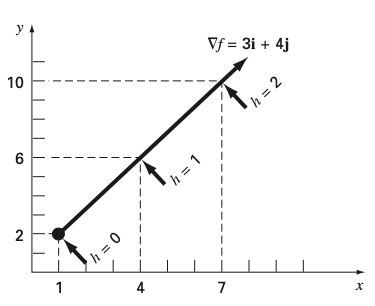

Depois, obtemos uma função de $h$ de primeiro grau, e o valor máximo dessa indica o valor máximo de $f(x,y)$.


**Exemplo 3**

Queremos encontrar o máximo de
$$f(x,y) = 2xy + 2x - x^2 - 2y^2$$
a partir do ponto $(-1,1)$.

As derivadas parciais são dadas por

\begin{eqnarray}
\dfrac{\partial f}{\partial x} & = & 2y + 2 - 2x \\
\dfrac{\partial f}{\partial y} & = & 2x - 4y
\end{eqnarray}

Calculando no ponto $(-1,1)$, temos
\begin{eqnarray}
\dfrac{\partial f}{\partial x} & = & 2(1) + 2 - 2(-1) = 6 \\
\dfrac{\partial f}{\partial y} & = & 2(1) - 4(-1) = -6
\end{eqnarray}

Portanto,

$$\overrightarrow{\nabla} f(\overrightarrow{x}) = 6\overrightarrow{i} - 6\overrightarrow{j}$$

Para encontrar o máximo, deve-se procurar ao longo da direção do gradiente, isto é, ao longo do eixo $h$, caminhando na direção desse vetor. A função pode ser expressa ao longo desse eixo como

\begin{eqnarray}
f \left( x_0 + \dfrac{\partial f}{\partial x}h, y_0 + \dfrac{\partial f}{\partial y}h \right) & = & f(-1 + 6h, 1 - 6h) \\ & = &
2(-1 + 6h)(1 - 6h) + 2(-1 + 6h)- (-1 + 6h)^2 - 2(1-6h)^2
\end{eqnarray}

onde as derivadas parciais são calculadas em $x = -1$ e $y = 1$.

Combinando esses termos, tem-se uma função unidimensional $g(h)$ que descreve
$f(x, y)$ ao longo do eixo $h$

$$g(h) = -180h^2 + 72h - 7$$

Agora, buscamos o valor máximo dessa função do primeiro grau, ou seja, buscamos o valor $h^\ast$ tal que $g'(h^\ast) = 0$.

Isto pode ser feito através dos algoritmos para encontrar raíes de funções do primeiro grau, estudadas em Matemática Computacional I. Por exemplo, podemos usar o método da bissecção:


In [8]:
def bissec(f, a, b, eps=0.001):
    err = b-a
    x_ant = a
    while err > eps:
        x = (a+b)/2.0
        if f(x) == 0:
            break
        elif f(x)*f(a) < 0:
            b = x
        else:
            a = x
        err = abs(x - x_ant)/abs(x)
        x_ant = x
    print(f'A raiz é: {round(x,4)}')
    return x

# a derivada de g é g'(h) = -360h + 72
g = lambda h: -360*h + 72
raiz = bissec(g, -0.5, 1, 1e-5)

A raiz é: 0.2


Esse valor obtido não é, de fato, o valor do máximo de $f$ que buscamos. Isto foi a primeira iteração do método. Usamos esse valor para encontrar a nova direção do gradiente, e recomeçar o método. A partir das equações

\begin{eqnarray}
x & = & x_0 + \dfrac{\partial f}{\partial x}h \\
y & = & y_0 + \dfrac{\partial f}{\partial y}h
\end{eqnarray}

alterando o valor de $h$ para o obtido acima:

\begin{eqnarray}
x & = & -1 + 6(0.2)  = 0.2 \\
y & = & 1 - 6(0.2) = -0.2
\end{eqnarray}

Calculamos as derivadas parciaias agora no ponto $(0.2, -0.2)$, obtendo o vetor

\begin{eqnarray}
\dfrac{\partial f}{\partial x} & = & 2(-0.2) + 2 - 2(0.2) = 1.2\\
\dfrac{\partial f}{\partial y} & = & 2(0.2) - 4(-1=0.2) = 1.2 \\
\overrightarrow{\nabla} f(\overrightarrow{x}) & = & 1.2\overrightarrow{i} + 1.2\overrightarrow{j}
\end{eqnarray}

Os valores do ponto são dados por

\begin{eqnarray}
x & = & 0.2 + 1.2h \\
y & = & -0.2 + 1.2h
\end{eqnarray}

Substituindo em $f$, temos

\begin{eqnarray}
f \left( 0.2 + 1.2h , -0.2 + 1.2h \right) & = & -1.44h^2 + 2.88h + 0.2
\end{eqnarray}

Repetimos, portanto, a busca do máximo dessa função, ou seja, o valor $h^\ast$ tal que $g'(h^\ast) = 0$. O máximo é obtido em $h^\ast = 1$, e portanto, o gradiente nos leva para o ponto

\begin{eqnarray}
x & = & 0.2 + 1.2.1 = 1.4 \\
y & = & -0.2 + 1.2.1 = 1
\end{eqnarray}

Abaixo, vamos fazer um gráfico que mostra exatamente a busca do máximo de $f$.

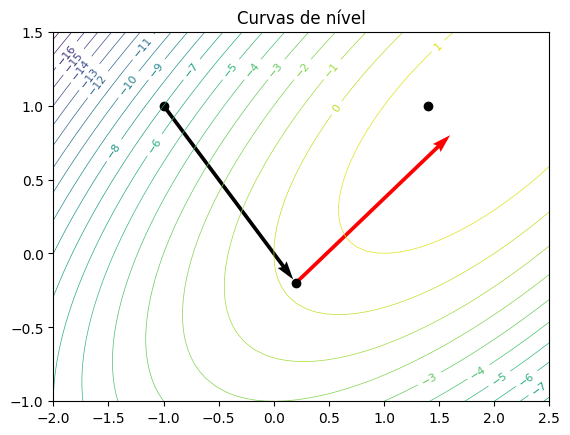

In [9]:
x = np.linspace(-2, 2.5)
y = np.linspace(-1, 1.5)
xi, yi = np.meshgrid(x, y)

f = lambda x,y: 2*x*y + 2*x - x**2 - 2*y**2


c = plt.contour(x, y, f(xi,yi), 20, linewidths=0.5)
plt.clabel(c, inline=2, fontsize=8)
plt.quiver(-1, 1, 0.2, -0.2, color='k',
           angles='xy', scale_units='xy', scale=0.17)
plt.quiver(0.2, -0.2, 1.4, 1, color='r',
           angles='xy', scale_units='xy', scale=1)
plt.scatter([-1,0.2,1.4],[1,-0.2,1], color ='k')
plt.title('Curvas de nível')
plt.show()

In [10]:
# O máximo vai ser obtido no ponto (1.4, 1)
f(1.4,1)

1.6399999999999997

Pode ser mostrado que o método do aclive máximo é linearmente convergente. Ademais, tende a se mover muito devagar ao longo de cristas longas e estreitas. Isso ocorre porque o novo gradiente em cada ponto de máximo será perpendicular à direção original. Logo, embora seja confiável, há outras abordagens que convergem muito mais rapidamente.

**Atividade 1**

Desenvolva um algoritmo que permite iterar o método do aclive máximo, e encontre o máximo da função

$$f(x,y) = 4x + 2y + x^2  - 2x^4 + 2xy - 3y^2 $$

usando as aproximações iniciais $x_0 = 0$ e $y_0 = 0$. Use a bissecção para encontrar o tamanho do passo ótimo na direção de busca do gradiente.

- Faça cinco iterações do método;
- Faça o gráfico da superfície da função $f(x,y)$;
- Faço o gráfico das curvas de nível com os vetores gradientes de cada passo.